In [55]:
from data_preparation import load_dataset,prepare_data
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# Ignore future warnings that often pop up
import warnings
warnings.filterwarnings("ignore")

In [86]:
# Exploratory data analysis on Boston housing data
df = load_dataset("housing_data.csv")
df = df.dropna()
print(df.head())
y = df["MEDV"]
x = df.drop(columns="MEDV")
x.describe()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
5  394.12   5.21  28.7  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<Figure size 432x288 with 0 Axes>

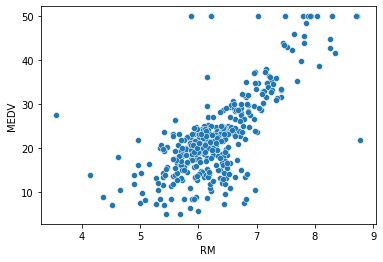

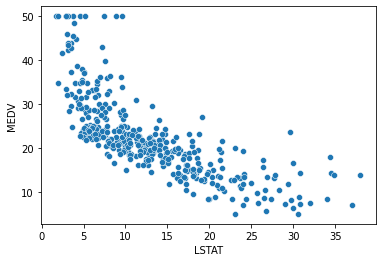

<Figure size 432x288 with 0 Axes>

In [87]:
# Plot the distribution of each variable in relation with the target, and look for correlated variable
# There are 13 variables, so we will display only the plots of those we found interesting : RM and LSTAT
sb.scatterplot(df["RM"], y)
plt.figure()
sb.scatterplot(df["LSTAT"], y)
plt.figure()

We can see that there is some approximation of linear dependency between RM and MEDV, and also an inverse linear dependency between LSTAT and MEDV.
- RM is the average number of rooms per dwelling, it seems logical that more room -> more value.
- LSTAT is the percentage of the population that is of lower economic status. Modest people live in affordable houses.


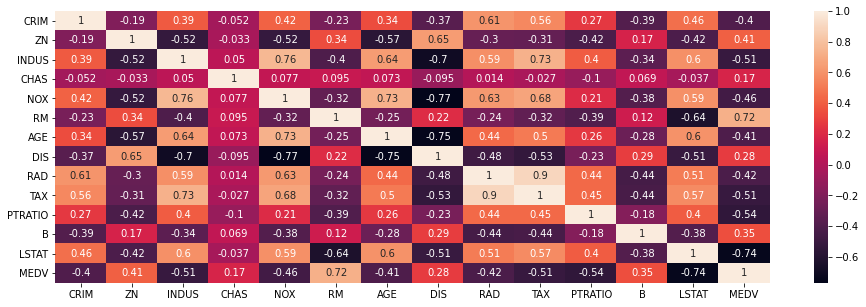

In [88]:
# PLot the correlation of variables
plt.figure(figsize=(16,5))
fig = sb.heatmap(df.corr(),annot=True)


From this correlation map we can see that the other variables are interesting (absolute correlation > .4) aswell, notably ZN, INDUS, NOX, AGE, TAX and PTRATIO. In other words, almost all variables are relevant to the problem